<a href="https://colab.research.google.com/github/lyssascherer/podcast_generation/blob/main/example_podcast_generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! git clone https://github.com/lyssascherer/podcast_generation.git

In [1]:
import os
os.chdir('podcast_generation')

In [ ]:
! pip install -r requirements.txt

In [ ]:
%env ELEVENLABS_API_KEY= # add your elevenlab key
%env OPENAI_API_KEY= # add your openai key

# Define podcast

In [6]:
# https://en.wikipedia.org/wiki/Common_kingfisher
page_name = "Common Kingfisher"
podcast_name = "Birds are awsome!"
podcast_slug = "common_kingfisher"

# Generate podcast text

In [7]:
import src.generate_text as gt

### Getting data

I use [Wikipedia library](https://github.com/goldsmith/Wikipedia) to get the contents of a page. The text can come from anywhere, you could for instance get the data from a pdf or a book.


In [8]:
input_text = gt.get_page_content_from_wikipedia(page_name)

### Creating dialogue Script

Here we use OpenAI ChatGPT-3.5-turbo throught langchain to generate the script based on a given text input.

We use a sequential chain with the following chains:
-  Summarisation chain: create a summarisation chain using load_summarize_chain function from langchain with map_reduce chain type. This chain recieves chunks of text and create a summary for each step (map step) then concatenates all summaries in a single, concise summary (reduce step).
- Dialogue chain: create a function chain using create_structured_output_chain function from langchain. This will recieve a text summary and will generate a podcast dialogue between two people from it. The output will be a python dict with the dialogue.


In [9]:
output_dialogue = gt.create_podcast_dialogue_from_text(input_text, podcast_name, verbose=False)
podcast_dialogues = output_dialogue["podcast_dialogues"]
display(podcast_dialogues)

The text was splited into 2 chunks of texts.


[{'speaker_name': 'Mark',
  'speaker_text': "Welcome back to another episode of 'Birds are Awesome!' I'm your host, Mark, and today we have a very special guest with us. Please welcome Anna, an expert in all things birds!"},
 {'speaker_name': 'Anna',
  'speaker_text': "Thank you, Mark! I'm excited to be here and talk about one of my favorite birds, the common kingfisher."},
 {'speaker_name': 'Mark',
  'speaker_text': "I'm thrilled to have you here, Anna! So, let's dive right into it. Can you give us some description and distribution facts about the common kingfisher?"},
 {'speaker_name': 'Anna',
  'speaker_text': 'Absolutely! The common kingfisher, also known as the Eurasian kingfisher and river kingfisher, is a small bird with seven recognized subspecies. It has a sparrow-sized body with blue upperparts, orange underparts, and a long bill. The adult males have green-blue upperparts with a rufous patch by the bill base and ear-patch, while the females have an orange-red lower mandible 

# Audio generation

In [10]:
import src.generate_audio as ga
import os.path

### Text-to-speech

Use elevenlabs to generate voices given a podcast dialogue.


In [11]:
podcast_dialogues_sample = podcast_dialogues[:3] # sampling only initial dialogue to test
podcast_dialogues_sample

[{'speaker_name': 'Mark',
  'speaker_text': "Welcome back to another episode of 'Birds are Awesome!' I'm your host, Mark, and today we have a very special guest with us. Please welcome Anna, an expert in all things birds!"},
 {'speaker_name': 'Anna',
  'speaker_text': "Thank you, Mark! I'm excited to be here and talk about one of my favorite birds, the common kingfisher."}]

In [12]:
ga.generate_voices(podcast_dialogues_sample,f"audios/episodes/ep_{podcast_slug}.mp3")

### Creating into song

Use MusicGen from Audiocraft to generate a 15s song for the intro.


In [13]:
description = "earthy tones, environmentally conscious, ukulele-infused, harmonic, breezy, easygoing, organic instrumentation, gentle grooves"
audio = ga.create_audio_sample(description, save_filename="audios/intro_main_song")
audio

Intro song already created


### Creating sound effecs for intro

Use AudioGen from audiocraft to generate a sound effect that will be added as a background sound to the intro.

In [14]:
description = "sounds of birds"
effects = ga.create_effects_sample(description, save_filename="audios/intro_bird_effect")
effects

Intro effect already created


### All together

Mix intro sound with effects and concatenate with the podcast audio.

In [15]:
full_episode_audio = ga.add_into_ontro_podcast_audio(f"audios/episodes/ep_{podcast_slug}.mp3")
full_episode_audio.export(f"audios/full_episodes/ep_{podcast_slug}.mp3", format="mp3")
full_episode_audio

# Image generation

In [4]:
import src.generate_images as gi

### Generate cover image

Generate a image using stable-diffusion-xl-base-1.0 as base model and stable-diffusion-xl-refiner-1.0 as a refiner model.

Fetching 19 files:   0%|          | 0/19 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

SEED: 42 - PROMPT: Pop art illustration of a Common Kingfisher, comic book-inspired, vivid and contrasting colors, layered composition, retro flair, lively and expressive


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

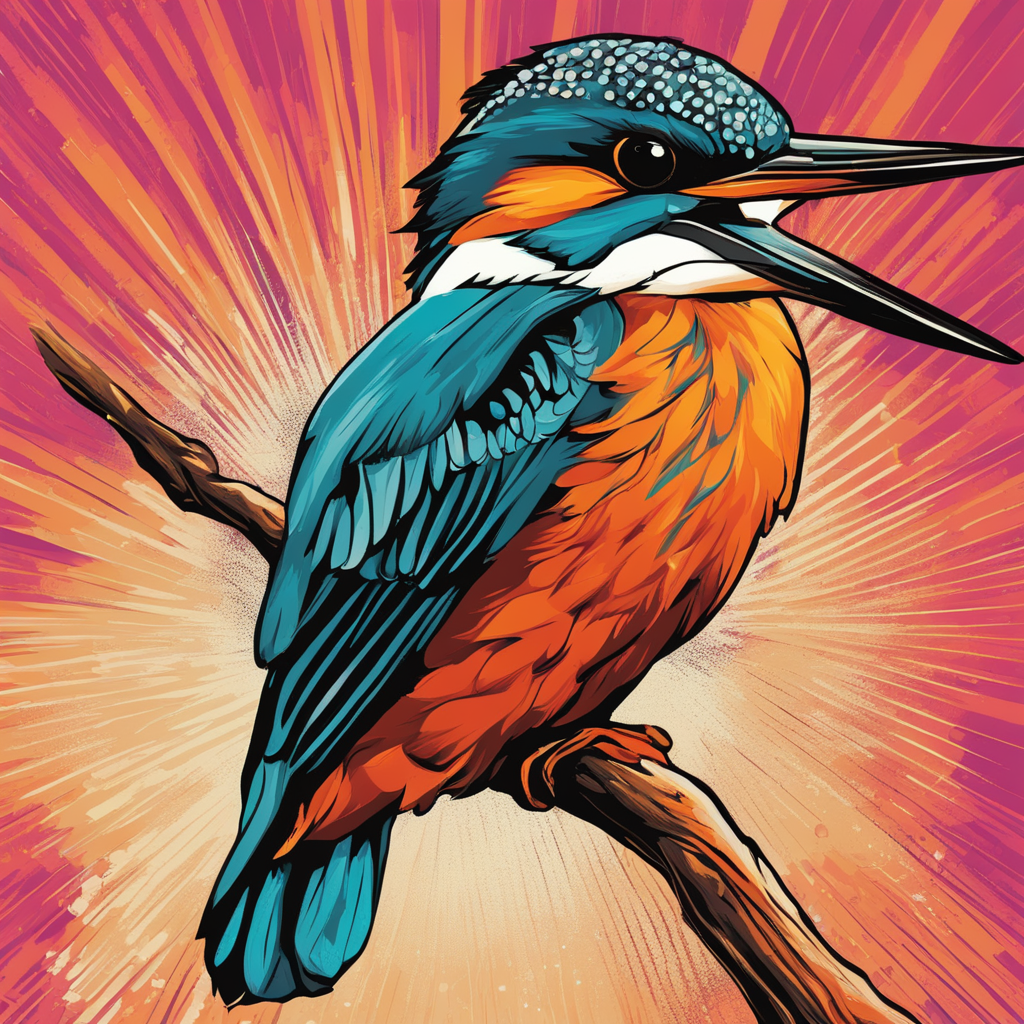

In [7]:
prompt_pop_art = f"Pop art illustration of a {page_name}, comic book-inspired, vivid and contrasting colors, layered composition, retro flair, lively and expressive"
negative_prompt = "multiple birds, out of frame, lowres, text, error, cropped, worst quality, low quality, duplicate, morbid, mutilated, out of frame, extra fingers, mutated hands, poorly drawn hands, poorly drawn face, mutation, deformed, blurry, dehydrated, bad anatomy, bad proportions, extra limbs, cloned face, disfigured, gross proportions, malformed limbs, missing arms, missing legs, extra arms, extra legs, fused fingers, too many fingers, long neck, username, watermark, signature"

image = gi.generate_cover(prompt_pop_art, negative_prompt, save_filename=f"covers/ep_{podcast_slug}.jpg")
image